# About Dataset:
AG is a collection of more than 1 million news articles gathered from over 2000 news sources by ComeToMyHead, an academic news search engine. Xiang Zhang created AG's news topic categorization dataset using the original AG dataset. It serves as a text classification benchmark in the paper "Character-level Convolutional Networks for Text Classification" by Xiang Zhang, Junbo Zhao, and Yann LeCun. The classification dataset is created by selecting the four largest classes from the original corpus. Each class consists of 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000, whereas testing samples are 7,600.

-> we will classify the news articales into 4 categories: "World News,"
"Sports News,"
"Business News,"
"Science Technology News"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
test_df=pd.read_csv('/content/AG news classification test.csv')
train_df=pd.read_csv('/content/AG news classification train.csv')

In [4]:
test_df.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [5]:
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [6]:
print(train_df.shape)
print(test_df.shape)

(120000, 3)
(7600, 3)


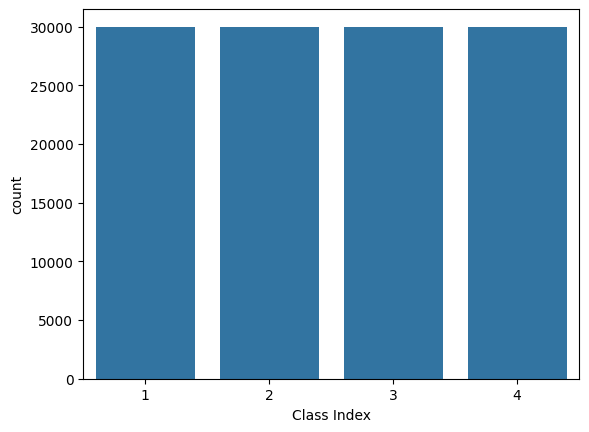

In [7]:
sns.countplot(x = 'Class Index', data = train_df)
plt.show()

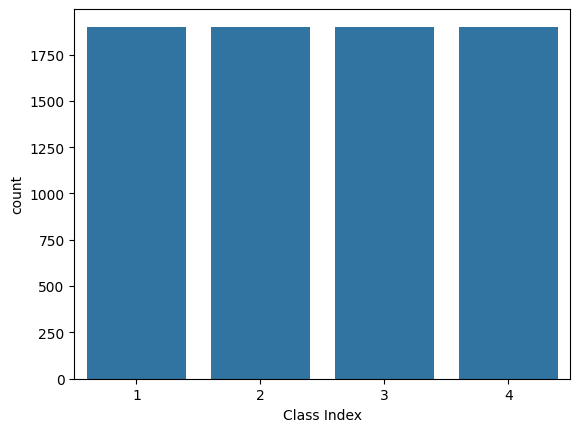

In [8]:
sns.countplot(x = 'Class Index', data = test_df)
plt.show()

In [9]:
test_df=test_df.rename(columns={'Class Index':'Class_Index'})
train_df=train_df.rename(columns={'Class Index':'Class_Index'})

## Preparing Data For a News Classification

In [10]:
train_x = train_df.Description
test_x = test_df.Description
train_y = train_df.Class_Index
test_y = test_df.Class_Index


## **Text Preprocessing**

In [11]:
import re
def remove_html_tag(text):
    html = re.compile('<.*?')
    cleaned_text = html.sub('', text)
    return cleaned_text
train_x = train_x.apply(remove_html_tag)
test_x = test_x.apply(remove_html_tag)

def url_remove(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
train_x = train_x.apply(url_remove)
test_x = test_x.apply(url_remove)

def word_tokenize(text):
    token = re.findall("[\w']+", text)
    return token
train_x = train_x.apply(word_tokenize)
test_x = test_x.apply(word_tokenize)


train_x = train_x.apply(lambda x: [word.lower() for word in x])
test_x = test_x.apply(lambda x: [word.lower() for word in x])


def remove_stopwords(lst):
    stop_words = set(stopwords.words('english'))
    return [word for word in lst if word.lower() not in stop_words]
train_x = train_x.apply(remove_stopwords)
test_x = test_x.apply(remove_stopwords)


<>:16: SyntaxWarning: invalid escape sequence '\w'
<>:16: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2672372510.py:16: SyntaxWarning: invalid escape sequence '\w'
  token = re.findall("[\w']+", text)


In [12]:
import string
def remove_punctuations(lst):
    return [''.join(char for char in word if char not in string.punctuation) for word in lst]
train_x = train_x.apply(remove_punctuations)
test_x = test_x.apply(remove_punctuations)


def remove_number(lst):
    return [''.join(char for char in word if char not in string.digits) for word in lst if word]
train_x = train_x.apply(remove_number)
test_x = test_x.apply(remove_number)

In [13]:
from nltk.stem import PorterStemmer
def stemming(text):
    porter_stemmer = PorterStemmer()
    return [porter_stemmer.stem(word) for word in text]
train_x = train_x.apply(stemming)
test_x = test_x.apply(stemming)


def remove_extra_words(word_list):
    stopwords = ['href', 'lt', 'gt', 'ii', 'iii', 'ie', 'quot', 'com']
    cleaned_list = []
    for word in word_list:
        if word not in stopwords:
            cleaned_list.append(word)
    return cleaned_list
train_x = train_x.apply(remove_extra_words)
test_x = test_x.apply(remove_extra_words)


def join_words_with_space(sentence):
    joined_sentence = ' '.join(sentence)
    return joined_sentence

In [14]:
train_x = train_x.apply(join_words_with_space)
test_x = test_x.apply(join_words_with_space)


## Word Cloud Visualization

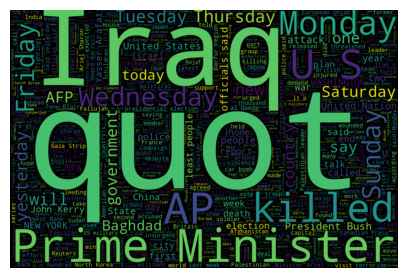

In [15]:
#I used the Word Cloud library to produce description data for news articles tagged with class_index 1 (world news)
#in the training dataset, and then displays the resulting word cloud plot
from wordcloud import WordCloud

world_news = train_df[train_df['Class_Index'] == 1]['Description']
plt.figure(figsize=(5, 5))
wordcloud = WordCloud(min_font_size=3, max_words=2500, width=1200, height=800).generate(" ".join(world_news))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

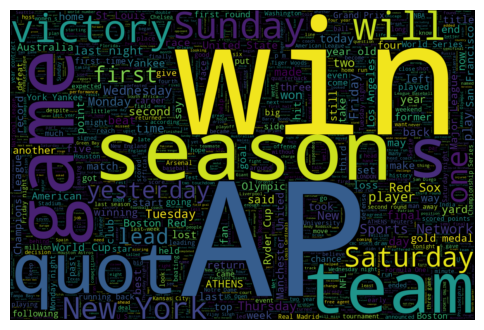

In [16]:
#word cloud for sports news category
sports_news = train_df.loc[train_df['Class_Index'] == 2, 'Description']
plt.figure(figsize=(6, 6))
wordcloud = WordCloud(min_font_size=3, max_words=2500, width=1200, height=800).generate(" ".join(sports_news))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

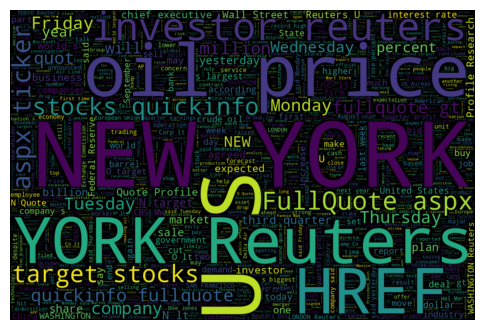

In [17]:
#word cloud for business news category
business_news = train_df.loc[train_df['Class_Index'] == 3, 'Description']
plt.figure(figsize=(6, 6))
wordcloud = WordCloud(min_font_size=3, max_words=2500, width=1200, height=800).generate(" ".join(business_news))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

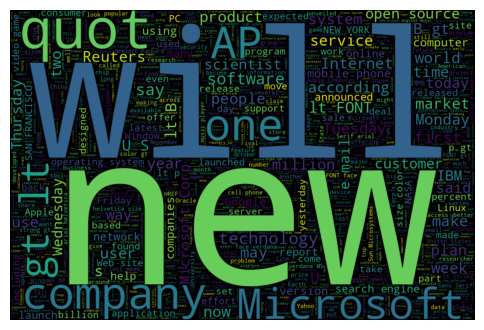

In [18]:
#word cloud for the Science Technology News
sci_news = train_df.loc[train_df['Class_Index'] == 4, 'Description']
plt.figure(figsize=(6, 6))
wordcloud = WordCloud(min_font_size=3, max_words=2500, width=1200, height=800).generate(" ".join(sci_news))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Convert into numerical features

## Feature Extraction

In [19]:
tfidf = TfidfVectorizer(
    min_df=8,          # word/phrase must appear in at least 8 documents
    ngram_range=(1,3), # unigrams, bigrams, trigrams
    max_features=5000  # keep only top 5000 features
)

train_1 = tfidf.fit_transform(train_x)
test_1 = tfidf.transform(test_x)
print("No. of features extracted:")
print(len(tfidf.vocabulary_))#number of unique features (words/bigrams/trigrams kept after filtering).
print("First 100 feature names:")
print(list(tfidf.vocabulary_.keys())[:100])


No. of features extracted:
5000
First 100 feature names:
['reuter', 'short', 'seller', 'wall', 'street', 'band', 'see', 'green', 'wall street', 'privat', 'invest', 'firm', 'group', 'reput', 'make', 'well', 'time', 'controversi', 'play', 'defens', 'industri', 'quietli', 'place', 'bet', 'anoth', 'part', 'market', 'soar', 'crude', 'price', 'plu', 'worri', 'economi', 'outlook', 'earn', 'expect', 'hang', 'stock', 'next', 'week', 'summer', 'stock market', 'next week', 'author', 'halt', 'oil', 'export', 'flow', 'main', 'pipelin', 'southern', 'iraq', 'intellig', 'show', 'rebel', 'militia', 'could', 'strike', 'infrastructur', 'offici', 'said', 'saturday', 'oil export', 'offici said', 'said saturday', 'afp', 'world', 'toppl', 'record', 'strain', 'present', 'new', 'econom', 'bare', 'three', 'month', 'us', 'presidenti', 'elect', 'world oil', 'oil price', 'three month', 'us presidenti', 'presidenti elect', 'world oil price', 'end', 'slightli', 'higher', 'friday', 'stay', 'near', 'low', 'year', 'sur

# Training The Model

### Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(train_1,train_y)



LogisticRegression(max_iter=200)

In [21]:
y_pred = log_reg.predict(test_1)

## Evaluate Performance

Accuracy: 0.8946052631578948
              precision    recall  f1-score   support

       World       0.92      0.89      0.90      1900
      Sports       0.94      0.96      0.95      1900
    Business       0.86      0.86      0.86      1900
    Sci/Tech       0.86      0.87      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



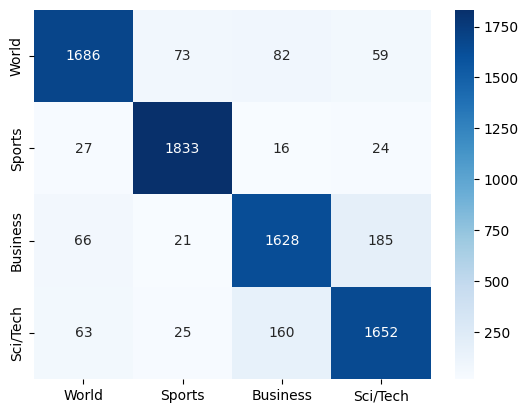

In [22]:
print("Accuracy:", accuracy_score(test_y, y_pred))
print(classification_report(test_y, y_pred, target_names=["World","Sports","Business","Sci/Tech"]))

conf_mat = confusion_matrix(test_y, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["World","Sports","Business","Sci/Tech"],
            yticklabels=["World","Sports","Business","Sci/Tech"])
plt.show()


# Try other Models

## **SVM**

In [23]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(train_1, train_y)

LinearSVC()

In [24]:
print("SVM Accuracy:", accuracy_score(test_y, svm.predict(test_1)))

SVM Accuracy: 0.8972368421052631


# Training using Neural Network (Keras)





In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the Model

model = Sequential()
model.add(Dense(256, activation="relu", input_shape=(train_1.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))   # 4 = number of categories


# Compile

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


# Adding Early Stopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True
)





/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Train the Model

history = model.fit(
    train_1.toarray(), train_y - 1, # Subtract 1 to make labels zero-indexed
    epochs=10,             # safe upper limit
    batch_size=64,
    validation_data=(test_1.toarray(), test_y - 1), # Subtract 1 to make labels zero-indexed
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.8197 - loss: 0.5084 - val_accuracy: 0.8982 - val_loss: 0.2993
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9142 - loss: 0.2558 - val_accuracy: 0.9025 - val_loss: 0.2914
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9268 - loss: 0.2163 - val_accuracy: 0.9051 - val_loss: 0.2958
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9414 - loss: 0.1769 - val_accuracy: 0.9047 - val_loss: 0.3041


In [29]:
# Evaluate
loss, acc = model.evaluate(test_1.toarray(), test_y - 1, verbose=0) # Subtract 1 to make labels zero-indexed
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9025


## **Comparing accuracy for every algorithm used and Neural Network**

In [30]:
# Get accuracy from Logistic Regression
log_reg_accuracy = accuracy_score(test_y, y_pred)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

# Get accuracy from SVM
svm_accuracy = accuracy_score(test_y, svm.predict(test_1))
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Get accuracy from Neural Network
nn_accuracy = history.history['val_accuracy'][-1]
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")



Logistic Regression Accuracy: 0.8946
SVM Accuracy: 0.8972
Neural Network Accuracy: 0.9047


In [31]:
# Compare accuracies
print("\n--- Model Comparison ---")
if log_reg_accuracy > svm_accuracy and log_reg_accuracy > nn_accuracy:
    print("Logistic Regression performed the best.")
elif svm_accuracy > log_reg_accuracy and svm_accuracy > nn_accuracy:
    print("SVM performed the best.")
elif nn_accuracy > log_reg_accuracy and nn_accuracy > svm_accuracy:
    print("Neural Network performed the best.")
elif log_reg_accuracy == svm_accuracy and log_reg_accuracy == nn_accuracy:
    print("All models performed equally.")
else:
    print("Performance is similar across models.")


--- Model Comparison ---
Neural Network performed the best.
